In [20]:
import cv2
import numpy as np


img = cv2.imread('train_ggb/Basophil/20190526_162951_0.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [21]:
pixel_list = np.reshape(img, (-1,3))
pixel_list

array([[254, 254, 154],
       [254, 254, 154],
       [255, 255, 155],
       ...,
       [254, 255, 153],
       [254, 255, 153],
       [254, 255, 153]], dtype=uint8)

In [22]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)
model.fit(pixel_list)

KMeans(n_clusters=5)

In [4]:
import matplotlib.pyplot as plt

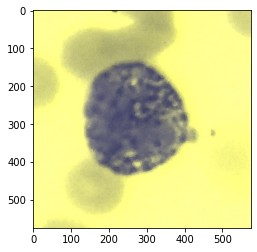

In [23]:
img2 = cv2.imread('train_ggb/Basophil/20190526_163414_0.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [24]:
model.cluster_centers_

array([[206.17895197, 206.11918927, 124.65204531],
       [254.25909926, 254.59413482, 148.45105226],
       [116.15070697, 116.11178491, 118.20627456],
       [231.799852  , 231.78328092, 130.4876708 ],
       [152.62620281, 152.730755  , 125.99565137]])

In [25]:
trans = model.predict(img2.copy().reshape((-1,3)))
trans

array([1, 1, 1, ..., 1, 1, 1])

In [26]:
center = np.uint8(model.cluster_centers_)
res = center[trans]
img_res = res.reshape((img2.shape))
img_res

array([[[254, 254, 148],
        [254, 254, 148],
        [254, 254, 148],
        ...,
        [206, 206, 124],
        [206, 206, 124],
        [206, 206, 124]],

       [[254, 254, 148],
        [254, 254, 148],
        [254, 254, 148],
        ...,
        [206, 206, 124],
        [206, 206, 124],
        [206, 206, 124]],

       [[254, 254, 148],
        [254, 254, 148],
        [254, 254, 148],
        ...,
        [206, 206, 124],
        [206, 206, 124],
        [206, 206, 124]],

       ...,

       [[254, 254, 148],
        [254, 254, 148],
        [254, 254, 148],
        ...,
        [254, 254, 148],
        [254, 254, 148],
        [254, 254, 148]],

       [[254, 254, 148],
        [254, 254, 148],
        [254, 254, 148],
        ...,
        [254, 254, 148],
        [254, 254, 148],
        [254, 254, 148]],

       [[254, 254, 148],
        [254, 254, 148],
        [254, 254, 148],
        ...,
        [254, 254, 148],
        [254, 254, 148],
        [254, 254, 148]]

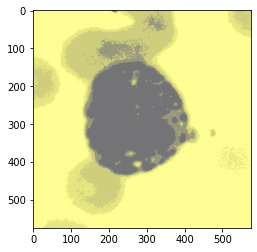

In [27]:
plt.imshow(img_res)

In [37]:
import os

In [28]:
img_list = []
folders = os.listdir('train_ggb')
for folder in folders:
    files = os.listdir(f'train_ggb/{folder}')
    for file in files[:1000]:
        img = cv2.imread(f"train_ggb/{folder}/{file}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (50,50))
        img_list += img.reshape((-1,3)).tolist()

img_list = np.uint8(img_list)
img_list

array([[254, 254, 154],
       [255, 255, 155],
       [255, 255, 155],
       ...,
       [196, 195, 113],
       [217, 216, 110],
       [247, 247, 122]], dtype=uint8)

In [40]:
model = KMeans(n_clusters=5)
model.fit(img_list)

KMeans(n_clusters=5)

In [41]:
import pickle

pickle.dump(model, open('kmeans_model_5.pk', 'wb'))

In [42]:
model = KMeans(n_clusters=7)
model.fit(img_list)

KMeans(n_clusters=7)

In [43]:
pickle.dump(model, open('kmeans_model_7.pk', 'wb'))

In [39]:
model.cluster_centers_

array([[251.8330353 , 251.91203398, 161.26888914],
       [ 72.70592316,  72.82194488, 107.04387913],
       [184.51849869, 184.51168124, 122.69120606]])

In [45]:
model_load = pickle.load(open('kmeans_model_7.pk','rb'))
model_load.cluster_centers_

array([[252.56233747, 252.66157127, 146.57826454],
       [186.04893056, 186.04498513, 122.97160516],
       [ 94.08716771,  94.2217259 , 113.90431475],
       [220.05650789, 220.0436656 , 130.27976165],
       [254.73504484, 254.81315046, 174.61752858],
       [146.53950239, 146.55325253, 115.69931224],
       [ 39.37194077,  39.47812898,  98.83297079]])